In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

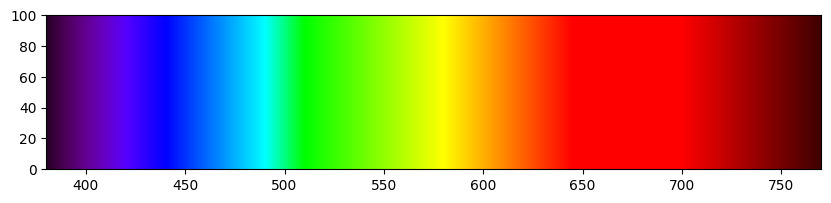

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def wavelength_to_rgb(wavelength):
    """
    Convert a wavelength (or array of wavelengths) in nanometers to RGB colors.

    Parameters:
    - wavelength (float or ndarray): Wavelength(s) in nanometers (380 nm to 780 nm).

    Returns:
    - ndarray: Array of shape (..., 3) with RGB values scaled between 0 and 1.
    """
    wavelength = np.asarray(wavelength)  # Convert to NumPy array if not already

    # Initialize RGB arrays
    R = np.zeros_like(wavelength, dtype=float)
    G = np.zeros_like(wavelength, dtype=float)
    B = np.zeros_like(wavelength, dtype=float)

    # Define color mapping
    mask1 = (380 <= wavelength) & (wavelength < 440)
    R[mask1] = -(wavelength[mask1] - 440) / (440 - 380)
    B[mask1] = 1.0

    mask2 = (440 <= wavelength) & (wavelength < 490)
    G[mask2] = (wavelength[mask2] - 440) / (490 - 440)
    B[mask2] = 1.0

    mask3 = (490 <= wavelength) & (wavelength < 510)
    G[mask3] = 1.0
    B[mask3] = -(wavelength[mask3] - 510) / (510 - 490)

    mask4 = (510 <= wavelength) & (wavelength < 580)
    R[mask4] = (wavelength[mask4] - 510) / (580 - 510)
    G[mask4] = 1.0

    mask5 = (580 <= wavelength) & (wavelength < 645)
    R[mask5] = 1.0
    G[mask5] = -(wavelength[mask5] - 645) / (645 - 580)

    mask6 = (645 <= wavelength) & (wavelength <= 780)
    R[mask6] = 1.0

    # Apply intensity correction with stronger dimming at edges
    factor = np.ones_like(wavelength, dtype=float)
    mask_dim1 = (wavelength < 420)
    factor[mask_dim1] = 0.15 + 0.85 * (wavelength[mask_dim1] - 380) / (420 - 380)  # Stronger fade-in
    
    mask_dim2 = (wavelength > 700)
    factor[mask_dim2] = 0.15 + 0.85 * (780 - wavelength[mask_dim2]) / (780 - 700)  # Stronger fade-out

    # Apply factor and clip
    R = np.clip(R * factor, 0, 1)
    G = np.clip(G * factor, 0, 1)
    B = np.clip(B * factor, 0, 1)

    return np.stack([R, G, B], axis=-1)

# Generate spectrum
l = np.arange(380, 771)  # Wavelengths from 380 to 770 nm
spec = wavelength_to_rgb(l)  # Get RGB values

# Create an image (height 100, width len(l), depth 3 for RGB)
spectrum_img = np.tile(spec, (100, 1, 1))

# Display the spectrum
plt.figure(figsize=(10, 2))
plt.imshow(spectrum_img, aspect='auto', extent = [380,770,0,100])
plt.show()


In [13]:
physical_data = pd.read_csv('Wavelengths.csv')
print(physical_data)

           Element  Grating/mm  0Degree  0minute  Degree  Minute
0         Hydrogen         100       -1       -5       4      49
1         Hydrogen         100       -1       -5       3      40
2         Hydrogen         100       -1       -5       3      13
3            Argon         100       -1       -5       4      30
4            Argon         100       -1       -5       4      14
5            Argon         100       -1       -5       3      59
6            Argon         100       -1       -5       3      35
7            Argon         100       -1       -5       3      28
8   Carbon Dioxide         100       -1       -5       4      41
9   Carbon Dioxide         100       -1       -5       4      32
10  Carbon Dioxide         100       -1       -5       4      11
11  Carbon Dioxide         100       -1       -5       3      50
12  Carbon Dioxide         100       -1       -5       3      31
13            Neon         100       -1       -5       4      32
14            Neon       

In [40]:
# Compute true_angle
physical_data["true_angle"] = (physical_data["Degree"] + physical_data["Minute"] / 60) + (physical_data["0Degree"] + physical_data["0minute"] / 60)

# Compute angle in decimal degrees (same as true_angle)
physical_data["angle_dec"] = physical_data["true_angle"]

# Convert angle to radians for wavelength calculation
physical_data["theta_rad"] = np.radians(physical_data["angle_dec"])

# Compute wavelength using n = Grating/mm converted to meters (1000 lines/mm → 1e3 lines/m)
physical_data["wavelength"] = np.sin(physical_data["theta_rad"])/(physical_data["Grating/mm"])*10e5

physical_data["wavelength rnd"] = np.round(physical_data["wavelength"])
# Display result
print(physical_data)

           Element  Grating/mm  0Degree  0minute  Degree  Minute  true_angle  \
0         Hydrogen         100       -1       -5       4      49    3.733333   
1         Hydrogen         100       -1       -5       3      40    2.583333   
2         Hydrogen         100       -1       -5       3      13    2.133333   
3            Argon         100       -1       -5       4      30    3.416667   
4            Argon         100       -1       -5       4      14    3.150000   
5            Argon         100       -1       -5       3      59    2.900000   
6            Argon         100       -1       -5       3      35    2.500000   
7            Argon         100       -1       -5       3      28    2.383333   
8   Carbon Dioxide         100       -1       -5       4      41    3.600000   
9   Carbon Dioxide         100       -1       -5       4      32    3.450000   
10  Carbon Dioxide         100       -1       -5       4      11    3.100000   
11  Carbon Dioxide         100       -1 

In [ ]:
# Filter the DataFrame for Hydrogen and grating 100
def element_spectra(element, grating):
    df = physical_data[(physical_data['Element'] == element) & (physical_data['Grating/mm'] == grating)]
    # Extract the rounded wavelength column
    rounded_wavelengths=df['wavelength rnd'].values
    return rounded_wavelengths

    Element  Grating/mm  0Degree  0minute  Degree  Minute  true_angle  \
0  Hydrogen         100       -1       -5       4      49    3.733333   
1  Hydrogen         100       -1       -5       3      40    2.583333   
2  Hydrogen         100       -1       -5       3      13    2.133333   

   angle_dec  theta_rad  wavelength  wavelength rnd  
0   3.733333   0.065159  651.128611           651.0  
1   2.583333   0.045088  450.723975           451.0  
2   2.133333   0.037234  372.250882           372.0  
[651. 451. 372.]


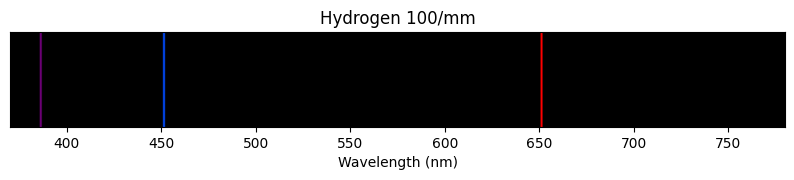

In [55]:
def make_spectrum(title, wavelengths, height = 100):
    # Given spectral wavelength data
    wavelengths = np.array([651, 451, 386])  # Rounded wavelengths
    width = 390
    # Normalize wavelength range to fit within the 390-pixel width
    min_wl, max_wl = 370, 780
    positions = np.round((wavelengths - min_wl) / (max_wl - min_wl) * (width - 1)).astype(int)

    # Create a 100x390x3 RGB image initialized to black
    spectrum_img = np.zeros((height, width, 3))

    # Apply colors at the spectral line positions
    for pos, wl in zip(positions, wavelengths):
        color = wavelength_to_rgb(wl)
        spectrum_img[:, pos, :] = color  # Fill the column with the corresponding color

    # Display the spectrum
    plt.figure(figsize=(10, 2))
    plt.imshow(spectrum_img, extent=[min_wl, max_wl, 0, height])
    plt.xlabel("Wavelength (nm)")
    plt.yticks([])
    plt.title(title)
    plt.show()

make_spectrum("Hydrogen 100/mm", rounded_wavelengths_h100, height = 50)

In [35]:
print(770-380)


390
